Виконати завдання за допомогою готових формул та перевірити за допомогою відповідних розподілів (Python).

In [82]:
import numpy as np

1. Біноміальний розподіл.
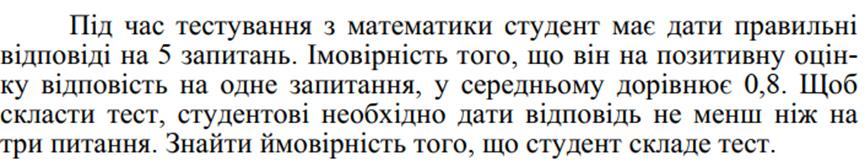

In [83]:
import math

def prob_bin_formula(n, p, k):
    return math.comb(n, k)*p**k * (1 - p)**(n - k)

def prob_bin(n, p, k, op="equal"):
    if op == "equal":
        return prob_bin_formula(n, p, k)
    elif op == "greater":
        return sum([prob_bin_formula(n, p, i) for i in range(k+1, n+1)])
    elif op == "greater_equal":
        return sum([prob_bin_formula(n, p, i) for i in range(k, n+1)])
    elif op == "less":
        return sum([prob_bin_formula(n, p, i) for i in range(0, k)])
    elif op == "less_equal":
        return sum([prob_bin_formula(n, p, i) for i in range(0, k+1)])

In [84]:
n = 5
p = 0.8
k = 3
                   
x = np.random.binomial(n, p, 100_000)

print(f"За формулами: {prob_bin(n, p, k, 'greater_equal')}")

print(f"Практично: {sum([1 for item in x if item >= k]) / len(x)}")

За формулами: 0.94208
Практично: 0.94114


2. Пуассонівський розподіл.
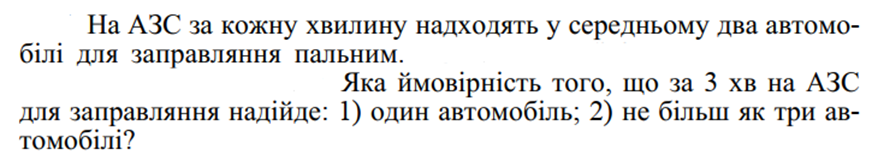

In [85]:
def prob_poiss_formula(a, k):
    return a**k / math.factorial(k) * math.exp(-a)

def prob_poiss(a, k, op="equal"):
    if op == "equal":
        return prob_poiss_formula(a, k)
    elif op == "greater":
        return sum([prob_poiss_formula(a, i) for i in range(k+1, n+1)])
    elif op == "greater_equal":
        return sum([prob_poiss_formula(a, i) for i in range(k, n+1)])
    elif op == "less":
        return sum([prob_poiss_formula(a, i) for i in range(0, k)])
    elif op == "less_equal":
        return sum([prob_poiss_formula(a, i) for i in range(0, k+1)])

In [87]:
a = 2
sample_time = 3

x = np.random.poisson(lam=a*sample_time, size=100_000)

print(f"1) За формулою {prob_poiss(a*sample_time, 1)}")
print(f"   Практично: {sum([1 for item in x if item == 1]) / len(x)}")

print(f"2) За формулою {prob_poiss(a*sample_time, 3, op='less_equal')}")
print(f"   Практично: {sum([1 for item in x if item <= 3]) / len(x)}")

1) За формулою 0.014872513059998151
   Практично: 0.01491
2) За формулою 0.15120388277664787
   Практично: 0.15001


3. Нормальний закон розподілу.  
Заряд мисливського пороху зважують на терезах, що мають
стандартне відхилення зважування 0,5 г. Середня маса порохового заряду 4,5 г. Визначити ймовірність пошкодження мисливської рушниці при пострілі, якщо максимально допустима вага порохового заряду 4,9 г. Тобто, знайдіть ймовірність того, що випадково взятий пороховий заряд буде важити більше 4,9 г.


In [88]:
def cdf_normal(a, sigma, x):
    return 1/2 * (1 + math.erf((x - a) / (sigma * math.sqrt(2))))

def prob_normal(a, sigma, x=0, interval=[0, 0], op="greater"):
    if op == "greater":
        return 1 - cdf_normal(a, sigma, x)
    elif op == "less":
        return cdf_normal(a, sigma, x)
    elif op == "interval":
        return cdf_normal(a, sigma, interval[1]) - cdf_normal(a, sigma, interval[0])

In [89]:
a = 4.5
sigma = 0.5

x = np.random.normal(loc=a, scale=sigma, size=100_000)

print(f"За формулою {prob_normal(a, sigma, x=4.9, op='greater')}")
print(f"Практично: {sum([1 for item in x if item > 4.9]) / len(x)}")

За формулою 0.21185539858339653
Практично: 0.21184


4. Рівномірний розподіл.  
Випадкова величина $X$ має рівномірний розподіл на відрізку $[0; 80]$. Знайти ймовірність того, що $30<X<60$.


In [90]:
def prob_uniform_formula(a, b, x):
    if x <= a:
        return 0
    elif x > b:
        return 1
    else:
        return (x - a)/(b - a)

def prob_uniform(a, b, x=0, interval=[0, 0], op="greater"):
    if op == "greater":
        return 1 - prob_uniform_formula(a, b, x)
    elif op == "less":
        return prob_uniform_formula(a, b, x)
    elif op == "interval":
        return prob_uniform_formula(a, b, interval[1]) - prob_uniform_formula(a, b, interval[0])

In [91]:
a = 0
b = 80

x = np.random.uniform(low=a, high=b, size=100_000)

print(f"За формулою {prob_uniform(a, b, interval=[30, 60], op='interval')}")
print(f"Практично: {sum([1 for item in x if 30 < item < 60]) / len(x)}")

За формулою 0.375
Практично: 0.3737
